#### The task of the project is to distinguish between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock.Its a classification problem.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Sonar.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
V1       208 non-null float64
V2       208 non-null float64
V3       208 non-null float64
V4       208 non-null float64
V5       208 non-null float64
V6       208 non-null float64
V7       208 non-null float64
V8       208 non-null float64
V9       208 non-null float64
V10      208 non-null float64
V11      208 non-null float64
V12      208 non-null float64
V13      208 non-null float64
V14      208 non-null float64
V15      208 non-null float64
V16      208 non-null float64
V17      208 non-null float64
V18      208 non-null float64
V19      208 non-null float64
V20      208 non-null float64
V21      208 non-null float64
V22      208 non-null float64
V23      208 non-null float64
V24      208 non-null float64
V25      208 non-null float64
V26      208 non-null float64
V27      208 non-null float64
V28      208 non-null float64
V29      208 non-null float64
V30      208 non-null flo

There are no missing values. Alll the columns are of float data-type except that of Output variable which is categorical

In [5]:
df.shape

(208, 61)

In [6]:
df.skew()

V1     2.131088
V2     2.155644
V3     2.652518
V4     3.401697
V5     2.018141
V6     1.248166
V7     0.970820
V8     1.481107
V9     1.633870
V10    1.281258
V11    0.987813
V12    0.588681
V13    0.736584
V14    1.022369
V15    0.763964
V16    0.694671
V17    0.654480
V18    0.525845
V19    0.283182
V20   -0.085331
V21   -0.252741
V22   -0.392289
V23   -0.594350
V24   -0.691861
V25   -0.788909
V26   -0.671580
V27   -0.627843
V28   -0.615447
V29   -0.442007
V30   -0.132390
V31    0.259797
V32    0.313420
V33    0.423864
V34    0.563296
V35    0.591654
V36    0.619868
V37    0.676994
V38    1.033366
V39    0.908835
V40    0.861280
V41    0.863526
V42    0.860110
V43    0.909317
V44    1.235086
V45    1.366839
V46    1.706674
V47    1.790155
V48    1.277722
V49    1.273385
V50    1.761714
V51    2.716060
V52    2.093976
V53    1.060572
V54    1.093090
V55    1.789946
V56    1.780805
V57    1.653090
V58    2.098330
V59    1.737506
V60    2.775754
dtype: float64

## Outlier Treatment using standard deviation

In [7]:
df1=df[(df['V1']>(np.mean(df['V1'])-3.1*np.std(df['V1'])))&(df['V1']<(np.mean(df['V1'])+3.1*np.std(df['V1'])))]

In [8]:
df2=df1[(df1['V60']>(np.mean(df1['V60'])-3.3*np.std(df1['V60'])))&(df1['V60']<(np.mean(df1['V60'])+3.3*np.std(df1['V60'])))]

In [9]:
df3=df2[(df1['V58']>(np.mean(df2['V58'])-3.3*np.std(df2['V58'])))&(df2['V58']<(np.mean(df2['V58'])+3.3*np.std(df2['V58'])))]

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [10]:
df3.skew()

V1     1.451065
V2     1.718984
V3     1.867219
V4     1.944979
V5     1.513739
V6     1.366701
V7     0.974709
V8     1.423375
V9     1.543010
V10    1.343128
V11    1.082630
V12    0.556131
V13    0.649266
V14    0.793030
V15    0.796051
V16    0.754148
V17    0.683336
V18    0.553624
V19    0.296097
V20   -0.041192
V21   -0.254106
V22   -0.450817
V23   -0.603417
V24   -0.681648
V25   -0.872492
V26   -0.764587
V27   -0.724935
V28   -0.691002
V29   -0.532904
V30   -0.155581
V31    0.220845
V32    0.301417
V33    0.466338
V34    0.605801
V35    0.611440
V36    0.652357
V37    0.674941
V38    0.999004
V39    0.933966
V40    0.910823
V41    0.883122
V42    0.828997
V43    0.834288
V44    1.300300
V45    1.463335
V46    1.674841
V47    1.586421
V48    1.215349
V49    1.317016
V50    1.659763
V51    1.745685
V52    1.475867
V53    0.994623
V54    1.098040
V55    1.458245
V56    1.405955
V57    1.535027
V58    1.117806
V59    1.859839
V60    1.316065
dtype: float64

## Label encoding for output variable

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df3['Class']=le.fit_transform(df3['Class'])
le.classes_

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['Mine', 'Rock'], dtype=object)

Mine is represented as 0 and
Rock is represented as 1

In [12]:
df3.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'Class'],
      dtype='object')

## EDA

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


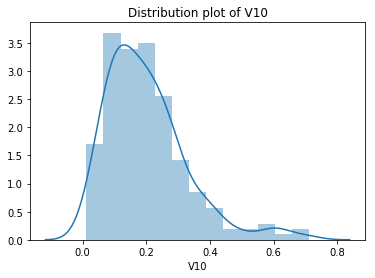

In [13]:
sns.distplot(df3['V10'])
plt.title("Distribution plot of V10")
plt.show()

From the above distplot, it can be seen that V10 is slightly right skewed

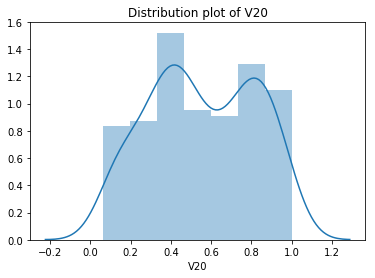

In [14]:
sns.distplot(df3['V20'])
plt.title("Distribution plot of V20")
plt.show()

From the above distplot of V20, it can be seen that it has 2 modes.ie. its bimodal.

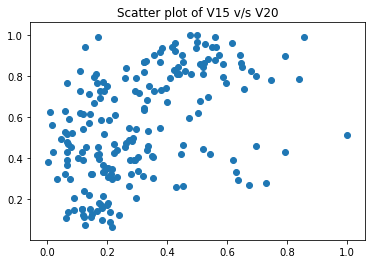

In [15]:
plt.scatter(df3['V15'],df3['V20'])
plt.title('Scatter plot of V15 v/s V20')
plt.show()

From the above scatter plot, it can be observed that, there is a slight positive correlation between V15 and V20

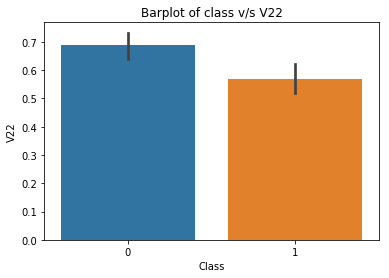

In [16]:
sns.barplot(df3['Class'],df3['V22'])
plt.title("Barplot of class v/s V22")
plt.show()

From the above barplot, class 0 is having higher values of V22

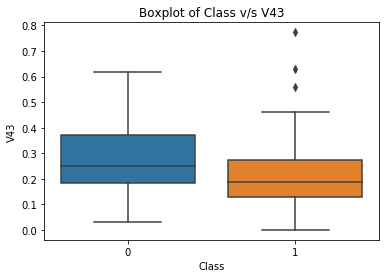

In [17]:
sns.boxplot(df3['Class'],df3['V43'])
plt.title("Boxplot of Class v/s V43")
plt.show()

From the above boxplot, we can see that Class 0 has higher values of V43

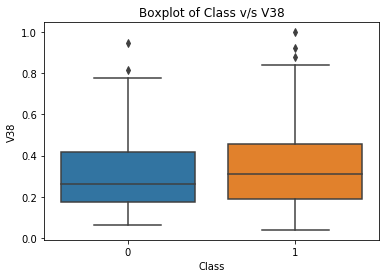

In [18]:
sns.boxplot(df3['Class'],df3['V38'])
plt.title("Boxplot of Class v/s V38")
plt.show()

From the above boxplot, we can observe that Class 1 is greater for V38

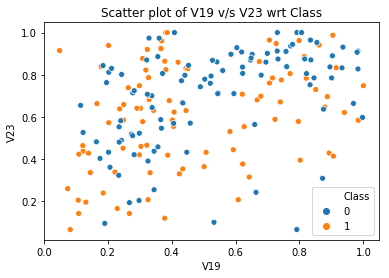

In [19]:
sns.scatterplot(df3['V19'],df3['V23'],hue=df3['Class'])
plt.title('Scatter plot of V19 v/s V23 wrt Class')
plt.show()

From the above scatter plot it can be observed that there is a slight positive correlation between V19 and V23

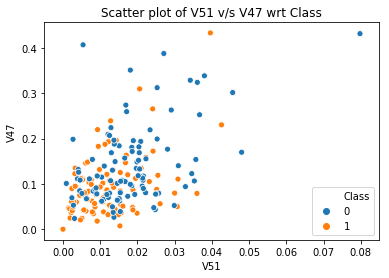

In [20]:
sns.scatterplot(df3['V51'],df3['V47'],hue=df3['Class'])
plt.title('Scatter plot of V51 v/s V47 wrt Class')
plt.show()

From the above graph, we can see that there is a positive relation between V51 and V47 for both the classes

In [21]:
#sns.pairplot(df3)
#plt.show()

## Define X and y

In [22]:
df3.shape

(197, 61)

In [23]:
X=df3.drop('Class',axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [24]:
y=df3['Class']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int32

## Train and Test split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

## Logistic model

In [26]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [27]:
#Fitting Logistic model
lg.fit(X_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
#For train data
y_pred_train=lg.predict(X_train)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
accuracy_score(y_train,y_pred_train)

0.7770700636942676

In [31]:
confusion_matrix(y_train,y_pred_train)

array([[64, 15],
       [20, 58]], dtype=int64)

In [32]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        79
           1       0.79      0.74      0.77        78

   micro avg       0.78      0.78      0.78       157
   macro avg       0.78      0.78      0.78       157
weighted avg       0.78      0.78      0.78       157



In [33]:
#for test data
y_pred_test=lg.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred_test)

0.75

In [35]:
confusion_matrix(y_test,y_pred_test)

array([[15,  6],
       [ 4, 15]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.71      0.79      0.75        19

   micro avg       0.75      0.75      0.75        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.75      0.75      0.75        40



## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(max_depth=10,min_samples_split=2,max_leaf_nodes=20)

In [38]:
rc.fit(X_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
y_pred_train=rc.predict(X_train)

In [40]:
accuracy_score(y_train,y_pred_train)

0.9936305732484076

In [41]:
confusion_matrix(y_train,y_pred_train)

array([[79,  0],
       [ 1, 77]], dtype=int64)

In [42]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       1.00      0.99      0.99        78

   micro avg       0.99      0.99      0.99       157
   macro avg       0.99      0.99      0.99       157
weighted avg       0.99      0.99      0.99       157



In [43]:
y_test_pred=rc.predict(X_test)

In [44]:
accuracy_score(y_test,y_test_pred)

0.8

In [45]:
confusion_matrix(y_test,y_test_pred)

array([[17,  4],
       [ 4, 15]], dtype=int64)

In [46]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.79      0.79      0.79        19

   micro avg       0.80      0.80      0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



## XG Boost

In [47]:
from xgboost import XGBClassifier
xg=XGBClassifier(n_estimators=30,learning_rate=0.2,max_depth=5)

In [48]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=30, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [49]:
y_pred_train=xg.predict(X_train)

In [50]:
accuracy_score(y_train,y_pred_train)

1.0

In [51]:
confusion_matrix(y_train,y_pred_train)

array([[79,  0],
       [ 0, 78]], dtype=int64)

In [52]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        78

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



In [53]:
y_test_pred=xg.predict(X_test)

In [54]:
accuracy_score(y_test,y_test_pred)

0.875

In [55]:
confusion_matrix(y_test,y_test_pred)

array([[17,  4],
       [ 1, 18]], dtype=int64)

In [56]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.82      0.95      0.88        19

   micro avg       0.88      0.88      0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40



## Serialization

In [57]:
import pickle

In [58]:
#Saving the model
sonar_model = pickle.dumps(xg) 

In [59]:
#Load the model whenever required
xg_from_pickle = pickle.loads(sonar_model) 

In [60]:
#Use model for prediction
xg_from_pickle.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0])